In [3]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipeline.to("cuda")
pipeline("An image of a squirrel in Picasso style").images[0]

from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
import torch

scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256").to("cuda")
scheduler.set_timesteps(50)

sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size), device="cuda")
input = noise

for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
        prev_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
        input = prev_noisy_sample

image = (input / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


AssertionError: Torch not compiled with CUDA enabled

In [7]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion


AssertionError: height and width of image must be 32

In [9]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)
diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 100,   # number of steps
    #loss_type = 'l1'    # L1 or L2
)
training_images = torch.randn(8, 3, 128, 128)
loss = diffusion(training_images)
loss.backward()
sampled_images = diffusion.sample(batch_size = 4)

sampling loop time step: 100%|██████████| 100/100 [03:18<00:00,  1.99s/it]


In [ ]:
sampled_images = diffusion.sample(batch_size = 4)
sampled_images

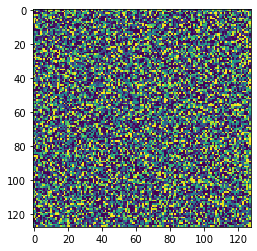

In [26]:
from matplotlib import pyplot as plt
sampled_images[0] * 256
plt.imshow(sampled_images[0,0], interpolation='nearest')